In [180]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import ensemble
import random
from sklearn.preprocessing import normalize

In [113]:
df = pd.read_csv("housing_prices.csv")
df = df[pd.notnull(df["Price"])]
df = df[pd.notnull(df["Regionname"])]
df2 = df.drop("Price", 1)


In [114]:
df2.head()
#we have a lot of NaNs that need to be solved
#another question is do we need to somehow include address? does that matter? let's leave it out for now 

#so we left it out and didn't get far. we need to OHE

dd = pd.get_dummies(df2[["Regionname"]])
df2 = df2.join(dd)
suburb = pd.get_dummies(df2[["Suburb"]])
df2 = df2.join(suburb)

In [115]:

df2 = df2.drop("Address", 1)
df2 = df2.drop("Type", 1)
df2 = df2.drop("Method", 1)
df2 = df2.drop("SellerG", 1)
df2 = df2.drop("Propertycount", 1)
df2 = df2.drop("Date", 1)

In [116]:
df2 = df2.drop("CouncilArea", 1)
df2 = df2.drop("Regionname", 1)
df2 = df2.drop("Suburb", 1)

#df3 = df3.drop("Regionname", 1)
#df3 = df3.drop("Suburb", 1)

In [117]:
df2 = df2.drop("Date", 1)

ValueError: labels ['Date'] not contained in axis

In [118]:
#let's go from left to right. first, let's find out which columns have a nan
df3.columns

Index(['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
       ...
       'Suburb_Windsor', 'Suburb_Wollert', 'Suburb_Wonga Park',
       'Suburb_Wyndham Vale', 'Suburb_Yallambie', 'Suburb_Yarra Glen',
       'Suburb_Yarraville', 'Suburb_croydon', 'Suburb_viewbank', 'Latitude'],
      dtype='object', length=364)

In [119]:
df2["Distance"].describe()
df2["Distance"] = df2["Distance"].fillna(random.uniform(df2["Distance"].mean() - df2["Distance"].std(), df2["Distance"].mean() + df2["Distance"].std()))

In [120]:
df2["Bedroom2"] = df2["Bedroom2"].fillna(0)

In [121]:
df2["Bathroom"] = df2["Bathroom"].fillna(0)

In [122]:
df2["Car"] = df2["Car"].fillna(0)

In [123]:
#there is a big outlier here is affecting the std. We're going to use to the mean instead
df2["Landsize"] = df2["Landsize"].fillna(df2["Landsize"].mean())

In [124]:
#same as above
df2["BuildingArea"] = df2["BuildingArea"].fillna(df2["BuildingArea"].mean())

In [125]:
df2["YearBuilt"].describe()
df2["YearBuilt"] = df2["YearBuilt"].fillna(df2["YearBuilt"].mean())

In [126]:
#fix spelling
df2["Latitude"] = df2["Lattitude"]
df2 = df2.drop("Lattitude", 1)


In [127]:
df2["Latitude"].describe()
df2["Latitude"] = df2["Latitude"].fillna(random.uniform(df2["Latitude"].mean() - df2["Latitude"].std(), df2["Latitude"].mean() + df2["Latitude"].std()))

In [128]:
df2["Longitude"] = df2["Longtitude"]
df2 = df2.drop("Longtitude", 1)

In [129]:
df2["Longitude"].describe()
df2["Longitude"] = df2["Longitude"].fillna(random.uniform(df2["Longitude"].mean() - df2["Longitude"].std(), df2["Longitude"].mean() + df2["Longitude"].std()))

In [130]:
df2["Rooms_Bathroom"] = df2["Rooms"] * df2["Bathroom"]

In [131]:
df2["RoomsSq"] = df2["Rooms"] ** 2

In [132]:
df2["LandsizeSq"] = df2["Landsize"] ** 2
df2["Rooms_Landsize"] = df2["Rooms"] ** df2["Landsize"]

In [133]:
df2= df2.drop("Rooms_Landsize", 1)

In [134]:
#drop this
#df2["BuildingAreaSq"] = df2["BuildingArea"] ** 2

In [135]:
df2["BuildingArea_Landsize"] = df2["BuildingArea"] * df2["Landsize"]

In [136]:
df2["Bedroom2Sq"] = df2["Bedroom2"] ** 2

In [162]:
df2["BuildingArea_Landsize_RoomsSq"] = df2["BuildingArea_Landsize"] * df2["RoomsSq"]
#df3["BuildingArea_Landsize_RoomsSq"] = df2["BuildingArea_Landsize_RoomsSq"]

In [171]:
df2["DistanceSq"] = df2["Distance"] ** 2
#df3["DistanceSq"] = df2["DistanceSq"]

In [137]:
df3 = df2

0.183851946441


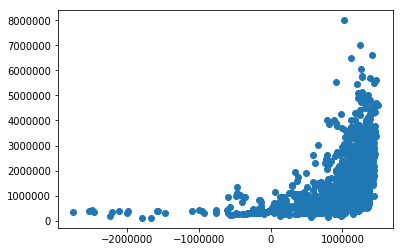

In [181]:
#the first model that jumps out at me is linear regression. A lot of talk about housing prices having a
#linear relationship. 
from sklearn.linear_model import Ridge
regr = Ridge()


x = normalize(df3)

y = df["Price"]


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( x, y, test_size=0.33)

#fit model
regr.fit(X_train,Y_train)

#predict x
pred = regr.predict(X_test)

#how much variance are we explaining?
print(regr.score(X_test,Y_test))  

#which features should we keep?
#print(regr.coef_)

#what type of errors are we getting? 
print(plt.scatter(pred,Y_test))

In [307]:
#let's check for overfitting
#from sklearn.model_selection import cross_val_score

#cross_val_score(regr, X_test, Y_test, cv=10)

In [186]:
params = {'n_estimators': 100,
          'subsample' : .7,
          'max_depth' : 5
          
          }
regr2 = ensemble.GradientBoostingRegressor(** params)

% time regr2.fit(X_train, Y_train)
pred2 = regr2.predict(X_test)
print(regr2.feature_importances_)
print('\n Accuracy by admission status')
print(regr2.score(X_test, Y_test))

Wall time: 2.35 s
[  9.17626379e-04   1.80721775e-04   5.93682506e-01   6.33641012e-05
   8.63977945e-02   1.89206014e-04   1.62583078e-03   1.43174611e-02
   4.68439036e-02   6.30218417e-02   1.92759744e-01]

 Accuracy by admission status
0.989507034547


In [167]:
#small > largest 
test = regr2.feature_importances_
test = pd.Series(test)
test2 = pd.concat([pd.Series(df3.columns),test],axis=1)


In [168]:
test2.columns = ["Features", "Importance"]

In [169]:

test3 = test2[test2["Importance"] <= 0.03]
test2


,Features,Importance
0,Rooms,0.044803
1,Distance,0.204004
2,YearBuilt,0.050078
3,Regionname_Southern Metropolitan,0.253453
4,Longitude,0.070542
5,Rooms_Bathroom,0.065043
6,RoomsSq,0.077191
7,BuildingArea_Landsize,0.051128
8,BuildingArea_Landsize_RoomsSq,0.183758


In [170]:
#df3 = df3.drop(test3["Features"], 1) 
#df3

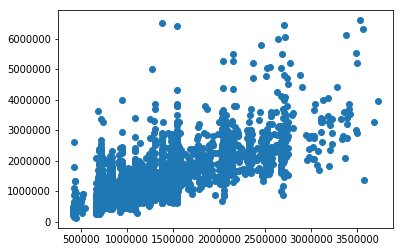

In [159]:
plt.scatter(pred2, Y_test)

In [187]:
#let's check for overfitting
from sklearn.model_selection import cross_val_score

cross_val_score(regr2, X_test, Y_test, cv=10)

array([ 0.98933465,  0.9947478 ,  0.99495461,  0.98101533,  0.99484797,
        0.99571301,  0.99354258,  0.99410103,  0.98875405,  0.9848239 ])

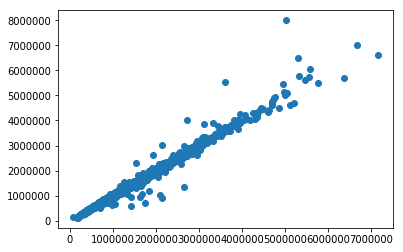

In [188]:
axes = plt.gca()

plt.scatter(pred2,Y_test)


In [185]:
params = {'n_estimators': 500,
          'max_depth': 5
          }
regr2 = ensemble.RandomForestRegressor(** params)

regr2.fit(X_train, Y_train)
pred2 = regr2.predict(X_test)

print('\n Accuracy by admission status')
print(regr2.score(X_test, Y_test))


 Accuracy by admission status
0.911337334899


In [158]:
from sklearn.svm import SVR
svr = SVR()
% time fit_svr = svr.fit(X_train, Y_train)

pred_svr = fit_svr.predict(X_test)

print('\n Accuracy by admission status')
#print(pd.crosstab(predict_test, Y_test))

print('\n Percentage accuracy')
print(svr.score(X_test, Y_test))


c:\users\sakok\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Wall time: 19.5 s

 Accuracy by admission status

 Percentage accuracy
-0.0772785651573


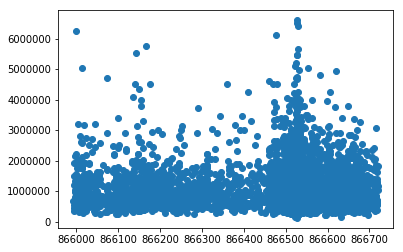

In [83]:
pred2
plt.scatter(pred_svr,Y_test)

In [174]:
df3["Price"] = df["Price"]

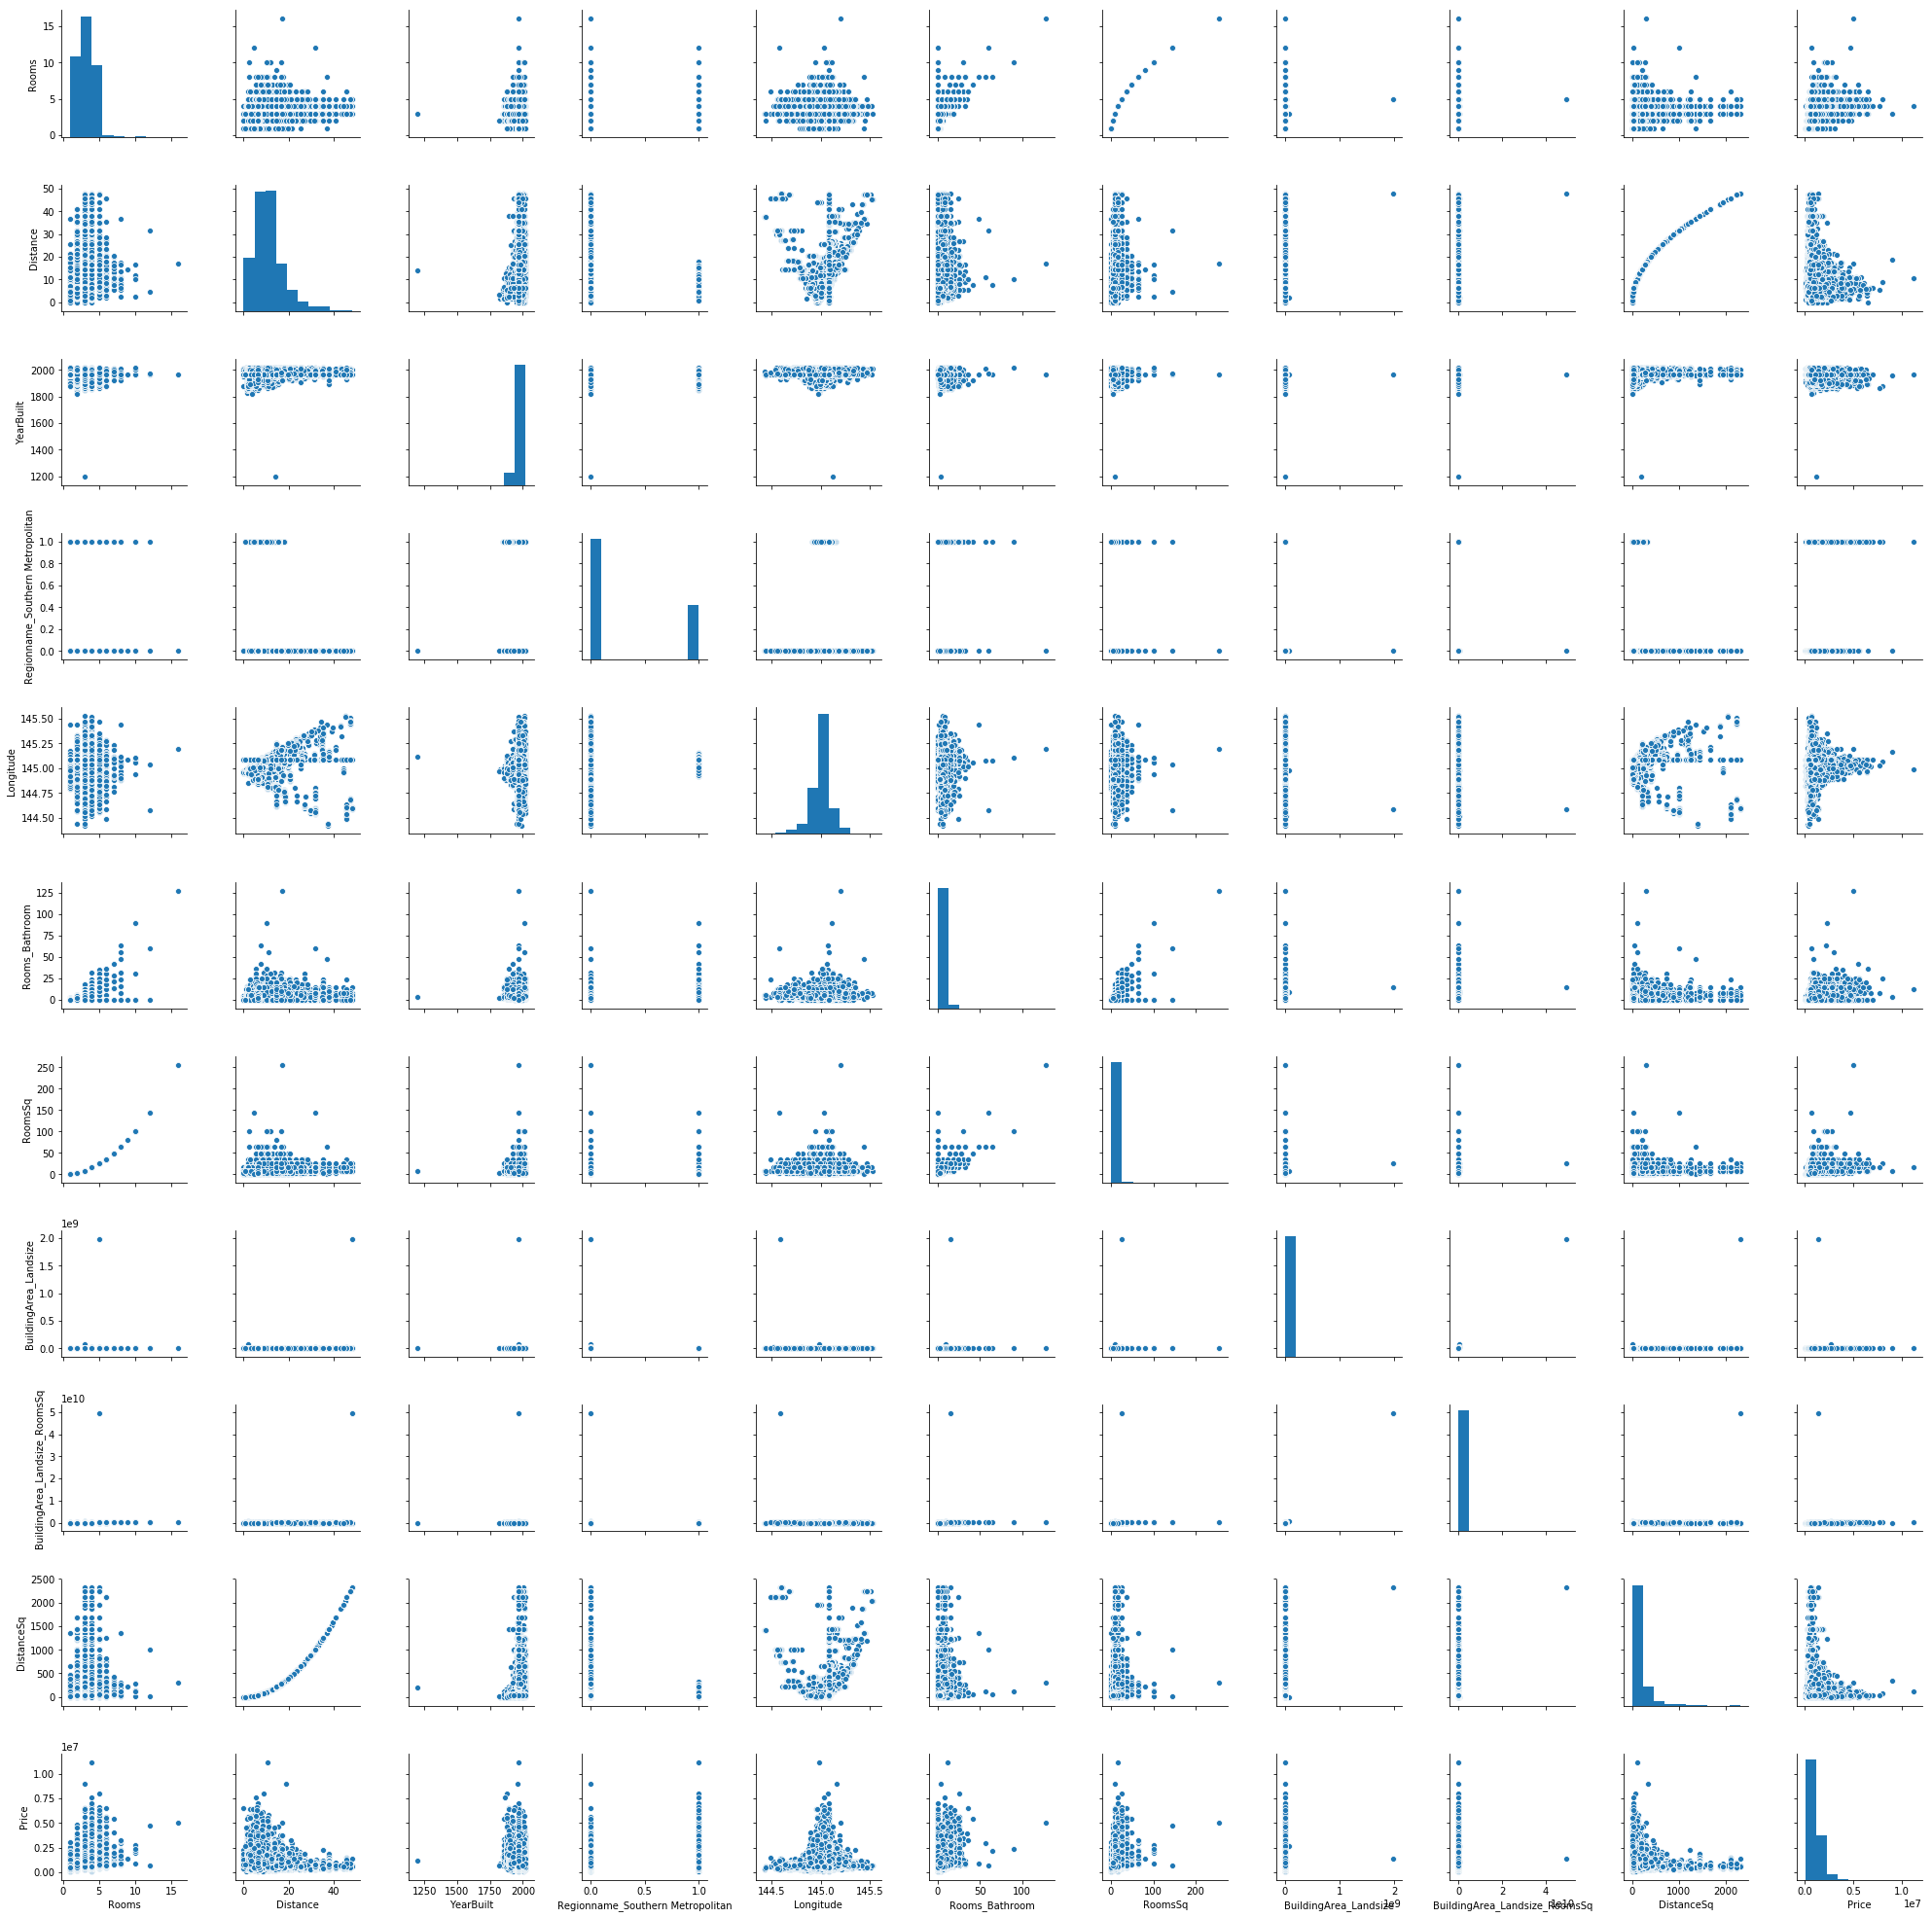

In [175]:
sns.pairplot(df3)

2919470.3106880663